## Imports

In [6]:
import glob  # To list files in the directory
import sys   # To verify the size of variables
import pickle # To dump data

from matplotlib import pyplot as plt
import numpy as np

from atmospheric_lidar import raymetrics

In [7]:
# Read the files paths, assuming they are located in a dir next to the notebook. 
file_paths = glob.glob('D:/GitHub/SAVANT-Lidar-Paraview/Aerosol/2018-10-17-18/0320/R*')
print("{} files found.".format(len(file_paths)))

160 files found.


In [8]:
# Read the first file, as an example
f = raymetrics.ScanningFile(file_paths[0], get_name_by_order=True)

In [9]:
print(f.channels.keys())  # See the names of the available channels (in your case just the channel order)

odict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


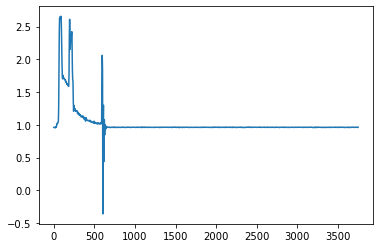

In [10]:
channel = f.channels[0]  # Get the first channel
plt.plot(channel.z[:1000], np.log10(channel.data[:1000]))  # Plot the log10 of the raw signal

In [11]:
# Now use the "Measurement" class to read a set of files
m = raymetrics.ScanningLidarMeasurement(file_paths, get_name_by_order=True)

In [12]:
c = m.channels[0]  # Get the measurement channel, containing data from all files
sys.getsizeof(c.data)   # Get the size of the channel
#f=open('channel0_dump.txt', 'w')
#pickle.dump(repr(c.data.decode("utf-8")), f)
#f.close()
#print(c.data)
np.savetxt('sample.txt', c.z, delimiter=',')
np.save('test.out', c.data)

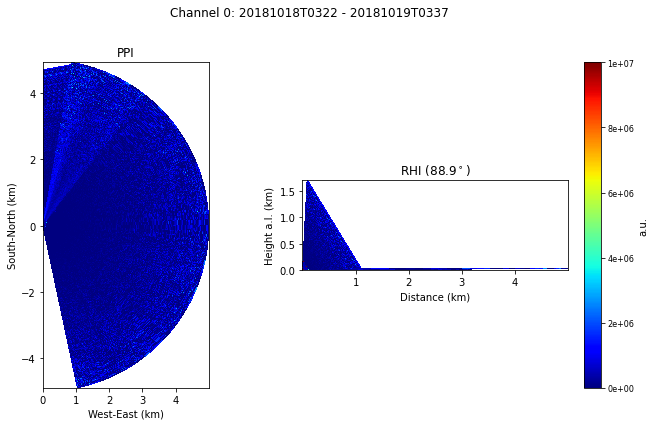

In [13]:
c.plot_scan(figsize=(10, 6),    # Size of the plots
            z_min=0,z_max=5000, # Range limits
            vmin=0, vmax=1e7,   # Image limits
            mask_noise=False)   # Cut blank regions

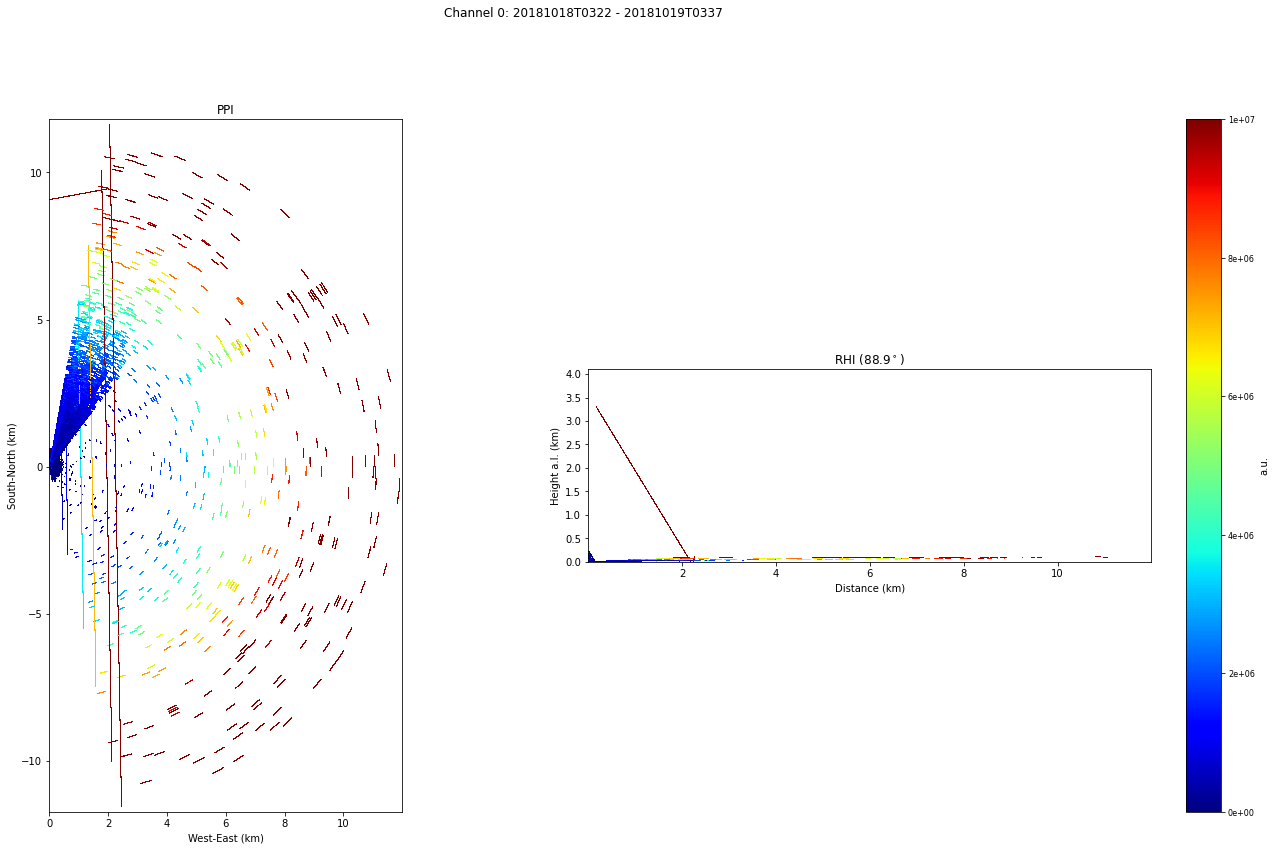

In [14]:
c = m.channels[0]
c.plot_scan(figsize=(20, 12), vmax=1e7)

In [16]:
%channel = m.channels[0]  # Get the first channel
%plt.plot(channel.z[:1000], np.log10(channel.data[:1000]))  # Plot the log10 of the raw signal

UsageError: Line magic function `%channel` not found.


In [ ]:
np.savetxt('c_matrix_dump.txt', c.matrix, delimiter=',')